In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sulianova/cardiovascular-disease-dataset")

print("Path to dataset files:", path)

c:\Users\souvik\anaconda3\envs\cardio_vascular_aws_sm\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 742k/742k [00:01<00:00, 682kB/s]

Extracting files...
Path to dataset files: C:\Users\souvik\.cache\kagglehub\datasets\sulianova\cardiovascular-disease-dataset\versions\1


# Task 1: Load Data

In [7]:
Filepath = "D:\\MLOPS\\cardio_vasuclar_disease_aws_sm\\cardiovascular-disease-dataset\\versions\\1\\cardio_train.csv"

#load the dataset
import pandas as pd
df = pd.read_csv(Filepath, sep=';')
print("Dataset loaded successfully.")
print(df.head().to_string(index=False))

Dataset loaded successfully.
 id   age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  active  cardio
  0 18393       2     168    62.0    110     80            1     1      0     0       1       0
  1 20228       1     156    85.0    140     90            3     1      0     0       1       1
  2 18857       1     165    64.0    130     70            3     1      0     0       0       1
  3 17623       2     169    82.0    150    100            1     1      0     0       1       1
  4 17474       1     156    56.0    100     60            1     1      0     0       0       0


In [8]:
df.head(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


# Task 2: Perform EDA

In [9]:
cardio_df =df.drop(columns='id')
cardio_df['age']= cardio_df['age'] // 365
cardio_df.head(5)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,47,1,156,56.0,100,60,1,1,0,0,0,0


In [10]:
cardio_df.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [11]:
cardio_df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,52.840671,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,6.766774,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,29.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
cardio_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


In [13]:
# Obtain the feature of the individual who has the highest blood pressure ap_hi
highest_bp = cardio_df.loc[cardio_df['ap_hi'].idxmax()]
print("Individual with highest blood pressure (ap_hi):")
print(highest_bp)

Individual with highest blood pressure (ap_hi):
age               47.0
gender             1.0
height           169.0
weight            70.0
ap_hi          16020.0
ap_lo             80.0
cholesterol        1.0
gluc               1.0
smoke              0.0
alco               0.0
active             0.0
cardio             1.0
Name: 40852, dtype: float64


In [17]:
# obtain the features of the individual who are older than 64.8 years old
older_individuals = cardio_df[cardio_df['age'] >= 64]
print("Individuals older than 64.8 years:")
older_individuals

Individuals older than 64.8 years:


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
23,64,2,156,45.0,110,60,1,1,0,0,1,0
38,64,2,162,72.0,130,80,1,1,1,0,1,1
70,64,1,155,57.0,120,80,1,1,0,0,1,1
72,64,1,156,58.0,110,70,1,1,0,0,1,0
142,64,2,169,73.0,140,90,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
69862,64,2,166,99.0,120,80,1,1,0,0,1,1
69865,64,1,149,49.0,115,75,1,1,0,0,1,0
69896,64,1,150,69.0,120,80,1,1,0,0,1,1
69936,64,2,171,70.0,140,90,1,1,0,0,1,0


# Task 3: Visualize Dataset

# Task 4: Create Train Test Dataset

In [18]:
df_target= cardio_df['cardio']
df_features = cardio_df.drop(columns='cardio')
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_features, df_target, test_size=0.2, random_state=42) 


# Task 5: Train and test XGBoost Model in local mode ( SM build in algorithm not used)

In [19]:
from xgboost import XGBClassifier
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.74


c:\Users\souvik\anaconda3\envs\cardio_vascular_aws_sm\lib\site-packages\xgboost\training.py:183: UserWarning: [16:09:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [20]:
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.77      0.75      6988
           1       0.76      0.70      0.73      7012

    accuracy                           0.74     14000
   macro avg       0.74      0.74      0.74     14000
weighted avg       0.74      0.74      0.74     14000



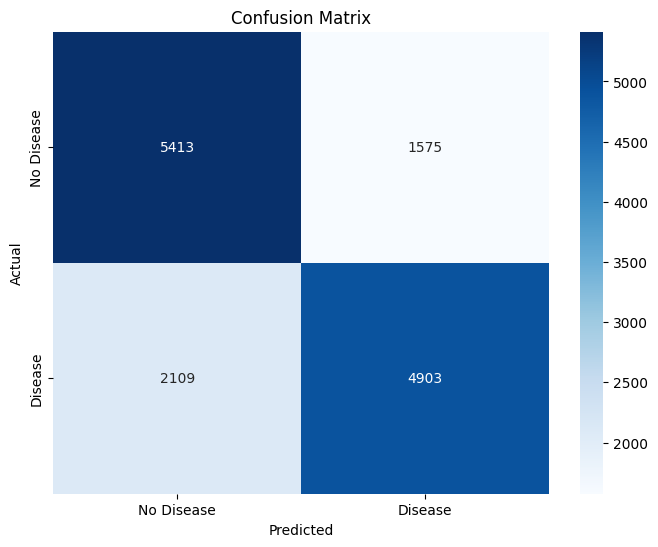

In [21]:
# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt 
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [25]:
# trial 2:

from xgboost import XGBClassifier
model1 = XGBClassifier(learning_rate=0.1,n_estimators=500,max_depth=20)
model1.fit(X_train, y_train)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred = model1.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.70


In [27]:
#hyperparameter tuning
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200,500],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb_model = XGBClassifier(objective='binary:logistic')
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', cv=3, verbose=4, n_jobs=1)
grid_search.fit(X_train, y_train)
print("Best parameters found: ", grid_search.best_params_)
 


Fitting 3 folds for each of 324 candidates, totalling 972 fits
[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8;, score=0.731 total time=   0.2s
[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8;, score=0.727 total time=   0.1s
[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8;, score=0.728 total time=   0.2s
[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0;, score=0.732 total time=   0.1s
[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0;, score=0.727 total time=   0.1s
[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0;, score=0.729 total time=   0.1s
[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estima

In [28]:
# Use the best parameters to create a new model on train data
best_model = XGBClassifier(**grid_search.best_params_, use_label_encoder=False, eval_metric='logloss')
best_model.fit(X_train, y_train)   

c:\Users\souvik\anaconda3\envs\cardio_vascular_aws_sm\lib\site-packages\xgboost\training.py:183: UserWarning: [17:19:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [29]:
#evaluate the best model
y_pred_best = best_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Best Model Accuracy: {accuracy_best:.2f}")


Best Model Accuracy: 0.74


In [30]:
#print Metrics from testing dataset
from sklearn.metrics import precision_score, recall_score, f1_score

print("Classification Report:")
print(classification_report(y_test, y_pred_best))

print("precision_score = {}".format(precision_score(y_test, y_pred_best)))
print("recall_score = {}".format(recall_score(y_test, y_pred_best)))
print("f1_score = {}".format(f1_score(y_test, y_pred_best)))



Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.78      0.75      6988
           1       0.76      0.70      0.73      7012

    accuracy                           0.74     14000
   macro avg       0.74      0.74      0.74     14000
weighted avg       0.74      0.74      0.74     14000

precision_score = 0.7623255813953488
recall_score = 0.7012264689104393
f1_score = 0.7305006685485069


# Task 6: Perform Dimensionality reduction using PCA (Using Sagemaker)

In [ ]:
import sagemaker
import boto3

sagemaker_session = sagemaker.Session()
role = sagemaker.get_execution_role()

import os
bucket=''
prefix = 'cardio_vasuclar_disease_aws_sm'



In [ ]:
import io
import numpy as np
import sagemaker.amazon.common as smac 

buf = io.BytesIO()
df_matrix=df_final.to_numpy()
smac.write_numpy_to_dense_tensor(buf, df_matrix, df_target.to_numpy())
buf.seek(0)


In [ ]:
import os
key='pca'
boto3.resource('s3').Bucket(bucket).Object(os.path.join(prefix, key)).upload_fileobj(buf)

s3_train_data ='s3:://{}/{}/{}'.format(bucket, prefix, key)

print('uploaded data to {}'.format(s3_train_data)
      )

output_location = 's3://{}/{}/output'.format(bucket, prefix)
print('training artifact will be uploaded to: {}'.format(output_location))

In [ ]:
from sagemaker.amazon.amazon_estimator import get_image_uri

container= get_image_uri(boto3.Session().region_name, 'pca')

                         

In [ ]:
pca = sagemaker.estimator.Estimator(container,
                                    role,
                                    instance_count=1,
                                    instance_type='ml.c4.xlarge',
                                    output_path=output_location,
                                    sagemaker_session=sagemaker_session)

pca.set_hyperparameters(feature_dim=11, num_components=6, algorithm='regular',substract_mean=False, mini_batch_size=100)





# pca.fit({'train': s3_train_data})



# Task 7: Deploy the trained PCA Model

In [ ]:
# Deploy the PCA model to an endpoint
pca_reduction = pca.deploy(initial_instance_count=1, instance_type='ml.m4.xlarge')

from sagemaker.predictor import csv_serializer, json_deserializer
pca_reduction.content_type = 'text/csv'
pca_reduction.serializer = csv_serializer
pca_reduction.deserializer = json_deserializer



In [ ]:
result = pca_reduction.predict(np.array(df_final))
result


In [ ]:
prediction=np.array([r['projection'] for r in result['projection']])

prediction

In [ ]:
prediction.shape

In [ ]:
# Clean up the endpoint after use
pca_reduction.delete_endpoint()


# Task 8: Train and evaluate XGBoost Model using PCA transformed data using Sagemaker

In [ ]:
prediction.shape

In [ ]:
train_data=pd.DataFrame({'Target':df_target})
train_data 

In [ ]:
for i in range(len(prediction.shape[1])):
    train_data[i]=prediction[:,i]
    

In [ ]:
train_data.head()

In [ ]:
train_data_size=int(0.9*train_data.shape[0])
train_data_size



In [ ]:
import sklearn

train_data=sklearn.utils.shuffle(train_data)
train,test,valid=train_data[:train_data_size], train_data[train_data_size:train_data_size + 3500], train_data[train_data_size:]

In [ ]:
train.shape, test.shape, valid.shape

In [ ]:
X_test, y_test = test.drop(columns='Target'), test['Target']

In [ ]:
train.to_csv('train_data.csv', header=False,index=False)
valid.to_csv('valid_data.csv',header=False, index=False)
# test.to_csv('test_data.csv',header=False, index=False)

In [ ]:
prefix='XGBOOST_CLASSIFIER'
key='XGBOOST_CLASSIFIER'



In [ ]:
with open('train_data.csv', 'rb') as f:
    boto3.resource('s3').Bucket(bucket).Object(os.path.join(prefix, key, 'train_data.csv')).upload_fileobj(f)

s3_train_data= 's3://{}/{}/{}'.format(bucket, prefix, key)
print('uploaded data to {}'.format(s3_train_data))



In [ ]:
with open('valid_data.csv', 'rb') as f:
    boto3.resource('s3').Bucket(bucket).Object(os.path.join(prefix, key, 'valid_data.csv')).upload_fileobj(f)

s3_valid_data= 's3://{}/{}/{}'.format(bucket, prefix, key)
print('uploaded data to {}'.format(s3_valid_data))



In [ ]:
output_location = 's3://{}/{}/output'.format(bucket, prefix)
print('training artifact will be uploaded to: {}'.format(output_location))  

In [ ]:
container = get_image_uri(boto3.Session().region_name, 'xgboost', '1.3-1')
from sagemaker.estimator import Estimator

xgb = Estimator(container,
                role,
                instance_count=1,
                instance_type='ml.m4.xlarge',
                output_path=output_location,
                sagemaker_session=sagemaker_session)

xgb.set_hyperparameters(max_depth=3,
                        objective='multi:softmax',
                        num_class=2,
                        eta=0.1,
                        num_round=100,
                        )

xgb.fit({'train': s3_train_data, 'validation': s3_valid_data})




In [ ]:
train_input=sagemaker.session.s3_input(s3_train_data, content_type='text/csv', s3_data_type='S3Prefix')
validation_input=sagemaker.session.s3_input(s3_valid_data, content_type='text/csv', s3_data_type='S3Prefix')


Xgboost_classifier.fit({'train': train_input, 'validation': validation_input}
                       
                       )

# Task 9: Deploy and test the trained XGBOOST Model

In [ ]:
Xgboost_classifier=Xgboost_classifier.deploy(initial_instance_count=1, instance_type='ml.m4.xlarge')

from sagemaker.predictor import csv_serializer, json_deserializer
Xgboost_classifier.content_type = 'text/csv'
Xgboost_classifier.serializer = csv_serializer
Xgboost_classifier.deserializer = json_deserializer



In [ ]:
#make predictions

xgb_prediction=Xgboost_classifier.predict(np.array(X_test))
xgb_prediction



In [ ]:
#custom code to convert the value in byte format to array:

def byte_2_array(x):
    l=str(x).split(',')
    l[0]=l[0][2:]   
    l[-1]=l[-1][:-1]

    for i in range(len(l)):
        l[i]=float(l[i])

    l= np.array(l).astype(np.float32)
    return l.reshape(1, -1)



In [ ]:
predicted_values=byte_2_array(xgb_prediction)
predicted_values

In [ ]:
y_test=np.array(y_test)
y_test=y_test.reshape(1, -1)

y_test

In [ ]:
#print Metrics from testing dataset
from sklearn.metrics import precision_score, recall_score, f1_score

print("Classification Report:")
print(classification_report(y_test, y_pred_best))

print("precision_score = {}".format(precision_score(y_test, y_pred_best)))
print("recall_score = {}".format(recall_score(y_test, y_pred_best)))
print("f1_score = {}".format(f1_score(y_test, y_pred_best)))

In [ ]:
# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt 
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
Xgboost_classifier.delete_endpoint()
